# Exploratory Data Analysis
Defining the amount of hotspots and popular areas in Bali, and to recheck if all the coordinates from the datasets are actually in Bali.


In [ ]:
import pandas as pd

# Path to the CSV file
file_path = '/content/bali_destinations.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

df.head()


,No,Destination Name,Address,Subdistrict,Regency,Latitude,Longitude,Category 1,Category 2,Category 3,Rating,Google Reviews (Count),Source,Child Entry,Adults Entry,Normal Hotel Price
0,1,Tanah Lot,"Beraban, Kec. Kediri, Kabupaten Tabanan, Bali ...",Kediri,Tabanan,-8.6212,115.0868,Historical Landmark,Temple,Tourist Destination,4.6,75899,https://www.google.com/maps/place/Tanah+Lot/@-...,"Rp30,000","Rp60,000",NaN
1,2,Mount Batur,"Bangli, Bali, Indonesia",Kintamani,Bangli,-8.2389,115.3775,Mountain,Lake,Tourist Destination,4.5,2580,https://www.google.com/maps/place/Mt+Batur/@-8...,NaN,NaN,NaN
2,3,Uluwatu Temple,"Uluwatu (South Kuta, Badung)",Kuta,Badung,-8.8291,115.0849,Temple,Historical Landmark,Tourist Destination,4.6,28800,https://www.google.com/maps/place/Uluwatu+Temp...,"Rp15,000","Rp30,000",NaN
3,4,Ubud Monkey Forest,"Jl. Monkey Forest, Ubud, Kecamatan Ubud, Kabup...",Ubud,Gianyar,-8.5194,115.2606,Wildlife,Forest,Tourist Destination,4.5,36099,https://www.google.com/maps/place/Sacred+Monke...,"Rp40,000","Rp50,000",NaN
4,5,Goa Gajah,"Gianyar, Bali",Ubud,Gianyar,-8.5069,115.2625,Historical Landmark,Temple,Tourist Destination,4.2,6683,https://www.google.com/maps/place/Goa+Gajah/@-...,"Rp25,000","Rp50,000",NaN


In [ ]:
#To check if the number of rows are complete. Don't mind the category, child entry, adults, and normal hotel price as those prices are only applicable to some.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No                      1288 non-null   int64  
 1   Destination Name        1288 non-null   object 
 2   Address                 1288 non-null   object 
 3   Subdistrict             1288 non-null   object 
 4   Regency                 1288 non-null   object 
 5   Latitude                1288 non-null   float64
 6   Longitude               1288 non-null   float64
 7   Category 1              1288 non-null   object 
 8   Category 2              1288 non-null   object 
 9   Category 3              1288 non-null   object 
 10  Rating                  1288 non-null   float64
 11  Google Reviews (Count)  1288 non-null   int64  
 12  Source                  1288 non-null   object 
 13  Child Entry             46 non-null     object 
 14  Adults Entry            27 non-null     

In [ ]:
df['Regency'] = df['Regency'].str.strip().str.title()

# Recompute the unique Regency names and their counts
regency_counts = df['Regency'].value_counts()

# Print unique Regency names and their counts
print(regency_counts)

Regency
Badung        548
Gianyar       335
Denpasar      136
Klungkung      85
Buleleng       63
Tabanan        42
Karangasem     41
Bangli         26
Jembrana       12
Name: count, dtype: int64


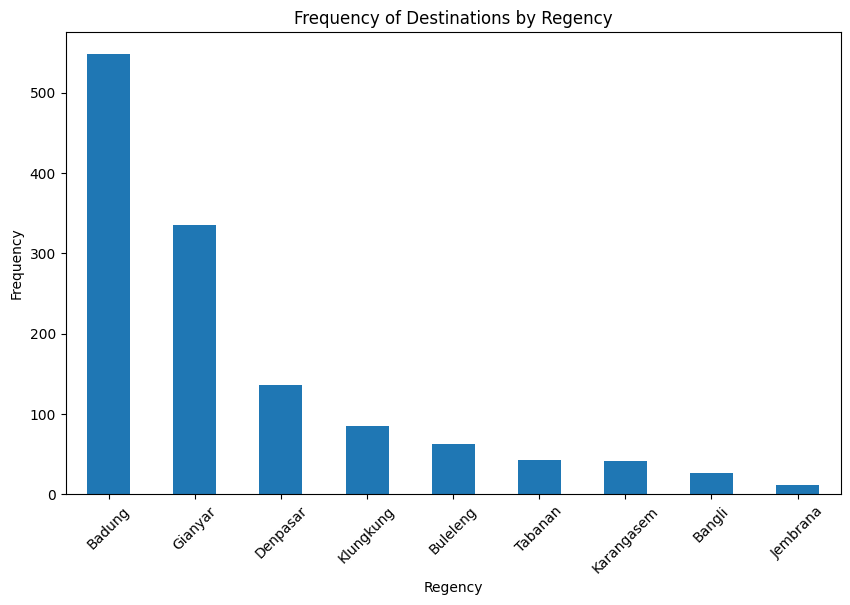

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
regency_counts.plot(kind='bar')
plt.xlabel('Regency')
plt.ylabel('Frequency')
plt.title('Frequency of Destinations by Regency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['Subdistrict'] = df['Subdistrict'].str.strip().str.title()

# Recompute the unique Regency names and their counts
subdistrict_counts = df['Subdistrict'].value_counts()

# Print unique Regency names and their counts
print(subdistrict_counts)

Subdistrict
Kuta                299
Ubud                264
Kuta Selatan        161
Denpasar Selatan     89
Nusa Penida          77
Kuta Utara           73
Tegallalang          28
Banjar               27
Denpasar Barat       23
Kintamani            22
Karangasem           17
Sukawati             14
Denpasar Utara       14
Gerokgak             14
Baturiti             12
Buleleng             11
Denpasar Timur       10
Manggis               9
Mengwi                9
Gianyar               8
Tampaksiring          8
Tabanan               8
Sukasada              7
Blahbatuh             7
Abang                 7
Kediri                7
Payangan              6
Kubu                  5
Seririt               4
Negara                4
Jembrana              4
Penebel               4
Marga                 3
Klungkung             3
Tejakula              2
Kerambitan            2
Petang                2
Selemadeg Timur       2
Nusa Dua              2
Rendang               2
Selemadeg             2
Temb

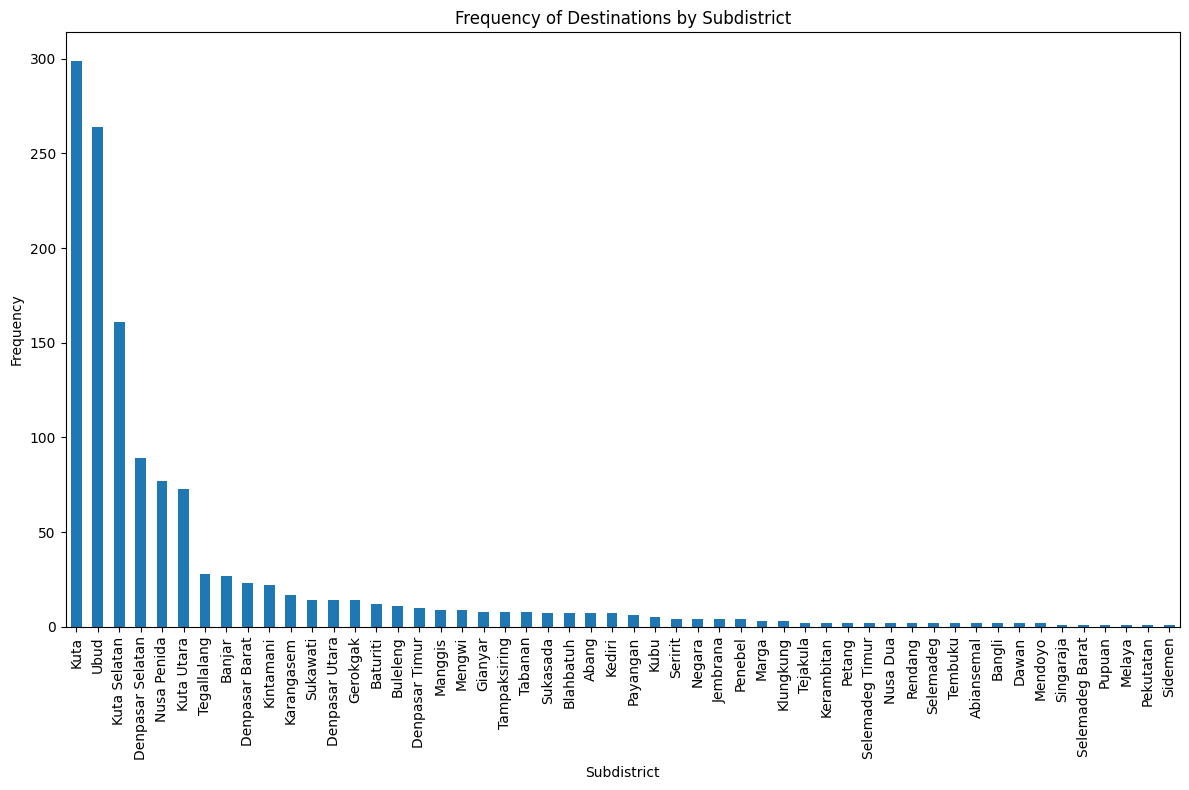

In [ ]:
plt.figure(figsize=(12, 8))
subdistrict_counts.plot(kind='bar')
plt.xlabel('Subdistrict')
plt.ylabel('Frequency')
plt.title('Frequency of Destinations by Subdistrict')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import folium
bali_map = folium.Map(location=[-8.4095, 115.1889], zoom_start=10)

# Add marker for each destinations
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Destination Name']}, {row['Subdistrict']}, {row['Regency']}",
        tooltip=row['Destination Name']
    ).add_to(bali_map)

# To display the map directly in the notebook
bali_map

Checking counts for each hotel categories

In [ ]:
# Removing whitespaces
df.rename(columns={'Category 2 ': 'Category 2'}, inplace=True)

# Filter out rows where Category 2 is not null
df_category2_not_null = df[df['Category 2'].notnull()]

# Categories of hotel to count
hotel_categories = ['Budget Hotel', 'Standard Hotel', 'Premium Hotel', 'High End Hotel',
                    'Luxury Hotel', 'Super Luxury Hotel', 'Ultra Luxury Hotel']

# Initialize a dictionary to store the counts
hotel_counts = {category: 0 for category in hotel_categories}

# Count occurrences of each hotel
for category in hotel_categories:
    hotel_counts[category] = df_category2_not_null[df_category2_not_null['Category 2'].str.contains(category, case=False)].shape[0]

# Display counts
print("Counts of Hotel Categories in Category 2 Column:")
for category, count in hotel_counts.items():
    print(f"{category}: {count}")

Counts of Hotel Categories in Category 2 Column:
Budget Hotel: 273
Standard Hotel: 302
Premium Hotel: 235
High End Hotel: 47
Luxury Hotel: 23
Super Luxury Hotel: 5
Ultra Luxury Hotel: 0


# Content Based Filtering
Below is the recommendation system if "Regency" matters.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Fill NaN values with empty strings
df.fillna('', inplace=True)

# Combine relevant features into a single string, including the Rating
df['combined_features'] = df.apply(lambda x: f"{x['Regency']} {x['Category 1']} {x['Category 2']} {x['Category 3']} {x['Rating']}", axis=1)

# Vectorize the combined features using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on a given destination
def get_recommendations(destination_name, cosine_sim=cosine_sim):
    # Get the index of the destination that matches the name
    idx = df[df['Destination Name'] == destination_name].index[0]

    # Get the pairwise similarity scores of all destinations with that destination
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the destinations based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar destinations
    sim_scores = sim_scores[1:11]

    destination_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar destinations
    return df[['Destination Name', 'Rating']].iloc[destination_indices]

# Example usage
destination_name = 'Goa Lawah Temple'
recommendations = get_recommendations(destination_name)

print(f"Recommendations for {destination_name}:")
for i, (name, rating) in enumerate(recommendations.values, 1):
    print(f"{i}. {name} - Rating: {rating}")


Recommendations for Goa Lawah Temple:
1. Pantai Batu Bolong - Rating: 4.4
2. Canyon Beji Guwang - Rating: 4.5
3. Uluwatu Temple - Rating: 4.6
4. Goa Gajah - Rating: 4.2
5. Tanah Lot - Rating: 4.6
6. Pura Ulun Danu Bratan - Rating: 4.7
7. Besakih Temple (Pura Besakih) - Rating: 4.5
8. Pura Penataran Agung Lempuyang - Rating: 4.3
9. Tirta Gangga - Rating: 4.6
10. Banjar Hot Spring - Rating: 4.3


In [ ]:
# from joblib import dump

# # Save the vectorizer
# dump(tfidf, 'tfidf_vectorizer.joblib')


['tfidf_vectorizer.joblib']

In [ ]:
# import numpy as np

# # Save the cosine similarity matrix
# np.save('cosine_similarity.npy', cosine_sim)


Here's if it doesn't matters

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Fill NaN values with empty strings
df.fillna('', inplace=True)

# Combine relevant features into a single string, excluding Regency
df['combined_features'] = df.apply(lambda x: f"{x['Category 1']} {x['Category 2']} {x['Category 3']} {x['Rating']}", axis=1)

# Vectorize the combined features using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on a given destination
def get_recommendations(destination_name, cosine_sim=cosine_sim):
    # Get the index of the destination that matches the name
    idx = df[df['Destination Name'] == destination_name].index[0]

    # Get the pairwise similarity scores of all destinations with that destination
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the destinations based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar destinations
    sim_scores = sim_scores[1:11]

    # Get the destination indices
    destination_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar destinations
    return df[['Destination Name', 'Rating']].iloc[destination_indices]

# Example usage
destination_name = 'Pura Ulun Danu Bratan'
recommendations = get_recommendations(destination_name)

print(f"Recommendations for {destination_name}:")
for i, (name, rating) in enumerate(recommendations.values, 1):
    print(f"{i}. {name} - Rating: {rating}")

Recommendations for Pura Ulun Danu Bratan:
1. Uluwatu Temple - Rating: 4.6
2. Goa Gajah - Rating: 4.2
3. Pura Ulun Danu Bratan - Rating: 4.7
4. Besakih Temple (Pura Besakih) - Rating: 4.5
5. Pura Penataran Agung Lempuyang - Rating: 4.3
6. Bajra Sandhi Monument - Rating: 4.6
7. Garuda Wisnu Kencana Cultural Park - Rating: 4.5
8. Bali Botanic Garden - Rating: 4.5
9. Goa Lawah Temple - Rating: 4.7
10. Tirta Gangga - Rating: 4.6


In [ ]:
# import joblib

# # Save the TfidfVectorizer, tfidf_matrix, and cosine_sim
# joblib.dump(tfidf, 'tfidf_vectorizer.joblib')
# joblib.dump(tfidf_matrix, 'tfidf_matrix.joblib')
# joblib.dump(cosine_sim, 'cosine_similarity.joblib')

['cosine_similarity.joblib']

# Collaborative Filtering
But since we do not have real user data, we're going to synthesize it with the scikit surprise library.

In [ ]:
!pip install scikit-surprise
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357230 sha256=0b8f7d23941d2fc18f8a59526324f068fcf05fc9e0cd33275fd339d91bc37bd9
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import numpy as np

np.random.seed(42)
user_ids = np.random.randint(1, 11, size=len(df))
ratings = np.random.randint(1, 6, size=len(df))  # Ratings between 1 and 5

# Create a DataFrame with user-item interactions
ratings_df = pd.DataFrame({
    'user_id': user_ids,
    'destination_id': df.index + 1,  # Assuming destinations have unique IDs starting from 1
    'rating': ratings
})

# Prepare data for Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['user_id', 'destination_id', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2)

# Build the SVD model (a type of collaborative filtering model)
model = SVD()

# Train the model
model.fit(trainset)

# Test the model
predictions = model.test(testset)

# Evaluate the model
accuracy.rmse(predictions)

# Function to get top N recommendations for a given user
def get_top_n_recommendations(model, user_id, n=10):
    all_destinations = df.index + 1  # Destination IDs
    user_destinations = ratings_df[ratings_df['user_id'] == user_id]['destination_id']
    unrated_destinations = [dest for dest in all_destinations if dest not in user_destinations.values]

    predictions = [model.predict(user_id, dest) for dest in unrated_destinations]
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    top_n_destinations = [pred.iid for pred in top_n_predictions]

    return df[df.index.isin([dest-1 for dest in top_n_destinations])][['Destination Name', 'Rating']]

# Example usage: Get top 10 recommendations for user with ID 1
user_id = 2
recommendations = get_top_n_recommendations(model, user_id)

print(f"Top 10 Recommendations for User {user_id}:")
for i, (name, rating) in enumerate(recommendations.values, 1):
    print(f"{i}. {name} - Rating: {rating}")

RMSE: 1.3839
Top 10 Recommendations for User 2:
1. Kuta Seaview Boutique Hotel & Spa - Rating: 4.4
2. Grand Sehati Hotel & Spa, Ubud - Rating: 4.1
3. Matahari Bungalow - Rating: 4.2
4. Taman Agung Hotel - Rating: 4.1
5. Bali Eco Living Dormitory - Rating: 3.8
6. Spice Beach Bar - Rating: 4.3
7. Labak Sari Restaurant - Rating: 4.7
8. CasCades Restaurant - Rating: 4.7
9. Sorrento Mediterranean Restaurant - Rating: 4.7
10. Fuzion Cafe - Rating: 4.6


In [ ]:
import pickle

# Save the SVD model to a file
with open('svd_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
# Get all ratings given by user 1
user_id = 2
user_ratings = ratings_df[ratings_df['user_id'] == user_id]

# Merge with the original df to get the destination names
user_ratings = user_ratings.merge(df[['Destination Name']], left_on='destination_id', right_index=True)

print(f"Ratings given by User {user_id}:")
print(user_ratings[['Destination Name', 'rating']])


Ratings given by User 2:
                    Destination Name  rating
16                          Bali Zoo       3
19              Tegenungan Waterfall       5
38     Urban Styles Inata Bisma Ubud       4
41            Prama Sanur Beach Bali       5
46    Kanvaz Village Resort Seminyak       4
...                              ...     ...
1236                    The Elephant       5
1251                      Paperhills       1
1254                SUKSMA KOPI UBUD       4
1268                      Awake Cafe       4
1272          Chris’ Café & Pool Bar       1

[111 rows x 2 columns]


# Onboarding Featuring

In [ ]:
# Display unique values in Category 1, Category 2, and Category 3 columns
unique_category_1 = df['Category 1'].unique()
unique_category_2 = df['Category 2'].unique()  # Note the space after 'Category 2'
unique_category_3 = df['Category 3'].unique()

print("Unique values in Category 1:")
print(unique_category_1)

print("\nUnique values in Category 2:")
print(unique_category_2)

print("\nUnique values in Category 3:")
print(unique_category_3)

Unique values in Category 1:
['Historical Landmark' 'Mountain' 'Temple' 'Wildlife' 'Rice Field' 'Beach'
 'Spiritual Journey' 'Water Palace' 'Waterfall' 'Water Activities'
 'Hiking' 'Local Market' 'Countryside' 'Traditional Villages' 'Hostprings'
 'Coffee Plantation' 'Stays' 'Day Spa' 'Balinese Spa' 'Health Club'
 'Luxury Spa' 'Beachside' 'Public Beach' 'Hidden Beach' 'Viewpoint'
 'Water Temple' 'Tourist Destination' 'Restaurant' 'Western'
 'Balinese restaurant' 'Fusion restaurant' 'Seafood' 'Italian'
 'Vegetarian' 'Mediterranean' 'Asian' 'Rice restaurant' 'Indonesian'
 'Buffet' 'Fine Dining' 'Steak' 'Asian Fusion' 'Vegan' 'French'
 'Nasi goreng restaurant' 'Peruvian' 'Bistro' 'Colombian' 'Hamburger'
 'Barbecue' 'Indian' 'Tapas' 'Greek' 'Cafe' 'Coffee shop' 'Health Food'
 'Orchard' 'Art cafe' 'Espresso bar' 'Coffee roasters' 'Turkish'
 "Children's museum"]

Unique values in Category 2:
['Temple' 'Lake' 'Historical Landmark' 'Forest' 'Countryside' 'Beachside'
 'Rice Field' 'Water Temple'

In [ ]:
def recommend_destinations(preferred_categories, top_n=5):
    # Filter the destinations based on preferred categories in any of the Category 1, 2, or 3 columns
    filtered_df = df[
        (df['Category 1'].isin(preferred_categories)) |
        (df['Category 2'].isin(preferred_categories)) |
        (df['Category 3'].isin(preferred_categories))
    ]

    # Sort the filtered destinations by Rating and select the top_n
    recommended_destinations = filtered_df.sort_values(by='Rating', ascending=False).head(top_n)

    return recommended_destinations[['Destination Name', 'Rating']]

# Simulate user selecting their preferred categories
user_preferred_categories = ['Historical Landmark', 'Temple', 'Beach', 'Wildlife', 'Mountain']

# Get recommendations based on user preferences
recommendations = recommend_destinations(user_preferred_categories, top_n=20)

print("Recommended Destinations based on your preferences:")
print(recommendations)

Recommended Destinations based on your preferences:
                        Destination Name  Rating
7                  Pura Ulun Danu Bratan     4.7
32                      Goa Lawah Temple     4.7
0                              Tanah Lot     4.6
2                         Uluwatu Temple     4.6
1031                   Pantai Green Bowl     4.6
9                         Nusa Dua Beach     4.6
25                 Bajra Sandhi Monument     4.6
19                          Tirta Gangga     4.6
18                        Bali Bird Park     4.6
1                            Mount Batur     4.5
1050        Ubud Monkey Forest Sanctuary     4.5
16    Garuda Wisnu Kencana Cultural Park     4.5
15               West Bali National Park     4.5
11                            Kuta Beach     4.5
10         Besakih Temple (Pura Besakih)     4.5
8                         Seminyak Beach     4.5
3                     Ubud Monkey Forest     4.5
1056                 Bali Botanic Garden     4.5
17               

# Collaborative Training H5 Model


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.optimizers import Adam

# Load the dataset
file_path = '/content/bali_destinations.csv'
df = pd.read_csv(file_path)

# Create a ratings DataFrame with user_id, destination_id, and rating
# For simplicity, let's create a random user-item rating matrix
num_users = 100  # Assume 100 users
num_destinations = df.shape[0]

np.random.seed(42)
user_ids = np.random.randint(1, num_users+1, size=1000)
destination_ids = np.random.randint(1, num_destinations+1, size=1000)
ratings = np.random.uniform(1, 5, size=1000).round(1)

ratings_df = pd.DataFrame({
    'user_id': user_ids,
    'destination_id': destination_ids,
    'rating': ratings
})

# Split the data into training and test sets
train_data, test_data = train_test_split(ratings_df, test_size=0.2, random_state=42)


In [ ]:
# Define model parameters
n_factors = 50  # Number of latent factors

# Define the model
user_input = Input(shape=(1,), name='user_input')
destination_input = Input(shape=(1,), name='destination_input')

user_embedding = Embedding(input_dim=num_users+1, output_dim=n_factors, name='user_embedding')(user_input)
destination_embedding = Embedding(input_dim=num_destinations+1, output_dim=n_factors, name='destination_embedding')(destination_input)

user_vecs = Flatten()(user_embedding)
destination_vecs = Flatten()(destination_embedding)

y = Dot(axes=1)([user_vecs, destination_vecs])

model = Model(inputs=[user_input, destination_input], outputs=y)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 destination_input (InputLa  [(None, 1)]                  0         []                            
 yer)                                                                                             
                                                                                                  
 user_embedding (Embedding)  (None, 1, 50)                5050      ['user_input[0][0]']          
                                                                                                  
 destination_embedding (Emb  (None, 1, 50)                64450     ['destination_input[0][0]'

In [ ]:
# Prepare the training data
train_user_data = train_data['user_id'].values
train_destination_data = train_data['destination_id'].values
train_ratings = train_data['rating'].values

# Train the model
history = model.fit(
    [train_user_data, train_destination_data],
    train_ratings,
    epochs=10,
    verbose=1,
    validation_split=0.1
)


Epoch 1/10
23/23 [==============================] - 1s 19ms/step - loss: 10.4075 - val_loss: 10.4326
Epoch 2/10
23/23 [==============================] - 0s 6ms/step - loss: 10.3587 - val_loss: 10.4323
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 10.3070 - val_loss: 10.4317
Epoch 4/10
23/23 [==============================] - 0s 7ms/step - loss: 10.2412 - val_loss: 10.4314
Epoch 5/10
23/23 [==============================] - 0s 6ms/step - loss: 10.1518 - val_loss: 10.4316
Epoch 6/10
23/23 [==============================] - 0s 6ms/step - loss: 10.0313 - val_loss: 10.4322
Epoch 7/10
23/23 [==============================] - 0s 6ms/step - loss: 9.8720 - val_loss: 10.4330
Epoch 8/10
23/23 [==============================] - 0s 5ms/step - loss: 9.6668 - val_loss: 10.4339
Epoch 9/10
23/23 [==============================] - 0s 6ms/step - loss: 9.4120 - val_loss: 10.4362
Epoch 10/10
23/23 [==============================] - 0s 6ms/step - loss: 9.1071 - val_loss: 10.4403


In [ ]:
# Save the model as an .h5 file
model.save('collaborative_filtering_model.h5')

print("Model saved as collaborative_filtering_model.h5")


Model saved as collaborative_filtering_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
